In [1]:
import os
os.chdir('/home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis')
print("Working Directory:", os.getcwd())
import ipywidgets as widgets

Working Directory: /home/fraza0/Desktop/MEI/TESE/nonverbal_communication_analysis


In [2]:
import pandas as pd
from pandas.io.json import json_normalize
import json
from pprint import pprint
import threading
from IPython.display import display
import ipywidgets as widgets
import time
import matplotlib.pyplot as plt
import numpy as np
from nonverbal_communication_analysis.environment import OPENFACE_OUTPUT_DIR, OPENPOSE_OUTPUT_DIR, VALID_OUTPUT_FILE_TYPES, RELEVANT_KEYPOINTS
from nonverbal_communication_analysis.utils import fetch_files_from_directory, filter_files

In [3]:
_dir = OPENPOSE_OUTPUT_DIR+"/walking_happy_output/"
input_files = [_dir+file for file in filter_files(fetch_files_from_directory([_dir]), valid_types = VALID_OUTPUT_FILE_TYPES)]
input_files.sort()
total_files = len(input_files)
print("Found: %s files" % total_files)

Found: 312 files


In [4]:
df = dict()
counter = 0
for file in input_files[:]:
    counter += 1
    with open(file) as json_data:
        data = json.load(json_data)
        df[counter] = data['people'][0]
        
df = pd.DataFrame(df).T[['pose_keypoints_2d', 'face_keypoints_2d']]
df

,pose_keypoints_2d,face_keypoints_2d
1,"[1266.37, 583.267, 0.901106, 1236.76, 736.621,...",[]
2,"[1266.35, 583.265, 0.902765, 1231.17, 736.611,...",[]
3,"[1266.42, 583.212, 0.89944, 1237, 742.385, 0.8...",[]
4,"[1266.51, 583.462, 0.918924, 1237.08, 748.258,...",[]
5,"[1266.46, 583.537, 0.923858, 1242.61, 759.921,...",[]
...,...,...
308,"[1148.49, 294.992, 0.904983, 1248.85, 659.878,...",[]
309,"[1148.6, 300.747, 0.940249, 1248.94, 659.891, ...",[]
310,"[1148.68, 306.851, 0.935539, 1249.03, 665.889,...",[]
311,"[1154.38, 312.624, 0.920444, 1248.93, 677.448,...",[]


## Pose-Related

![Keypoints mapping](../../../images/keypoints_pose_25.png)

In [5]:
# not standardized data. Extra step:
IMG_HEIGHT = 2160
IMG_WIDTH = 3840

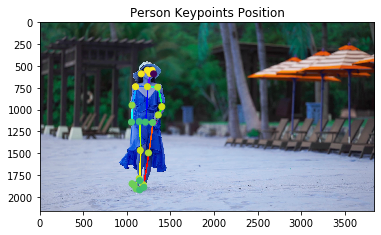

In [22]:
frame = df.iloc[0]
pose_df = [frame['pose_keypoints_2d'][x:x+3] for x in range(0, len(frame['pose_keypoints_2d']), 3)] 
pose_df = pd.DataFrame(pose_df, columns=['x', 'y', 'confidence'])

image = cv2.imread('/home/fraza0/Pictures/frame0.png')

fig, ax = plt.subplots()
ax.set_xlim(0, IMG_WIDTH)
ax.set_ylim(IMG_HEIGHT, 0)
ax.set_title('Person Keypoints Position')
ax.scatter(pose_df['x'], pose_df['y'], c=pose_df['confidence'])

plt.imshow(image)
plt.show()